In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import sys
import pickle
from pyDOE import *
from scipy.stats.distributions import norm

# Set plotting parameters
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [22]:
pop_dict = pickle.load(open('190506_LRA_d_sensitivity_loTN_-3.p','rb'))

b = 2000
tn = 60001
t = np.linspace(0,tn-1, b)/365
hy_heatmap = np.zeros([21,21,21])
for i in range(21):
    for j in range(21):
        for k in range(21):
            a= np.where(pop_dict['total'][i,j,k] < 10**2)[0]
            if len(a) == 0:
                hy_heatmap[i,j,k] = 0
            else:
                hy_heatmap[i,j,k] = t[a[0]]

In [12]:
TN_5 = hy_heatmap[:,:,1]

In [16]:
TN_4 = hy_heatmap[:,:,1]

In [23]:
TN_3 = hy_heatmap[:,:,1]

In [21]:
TN_2 = hy_heatmap[:,:,1]

In [42]:
TN_pop_test =np.concatenate([TN_5,TN_4, TN_3, TN_2]).reshape(4,21,21)

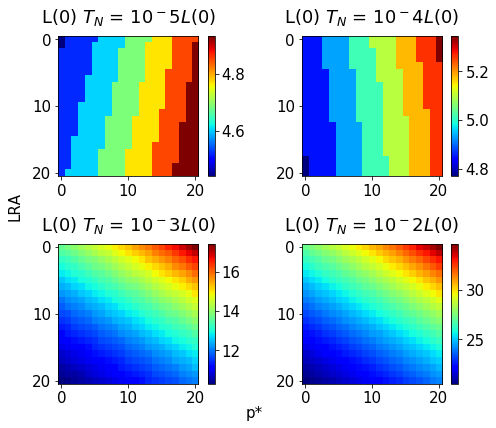

In [109]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(7, 6))

fig.text(0.5, 0.01, 'p*', ha='center')
fig.text(0.01, 0.5, 'LRA', va='center', rotation='vertical')

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(r'L(0) $T_N$ = $10^{} L(0)$'.format(np.linspace(-5,-2,4)[i].astype(int)), y = 1.05)
    im = plt.imshow(TN_pop_test[i,:,:], clim= ([np.min(TN_pop_test[i]), np.max(TN_pop_test[i])]), cmap = 'jet')
    cb = plt.colorbar(im, fraction = 0.046, pad = 0.05)

plt.tight_layout()